In [9]:
!wget https://raw.githubusercontent.com/j1fuller/COGS118C-CJDD/main/AD_EEG_sub_001.npy
!wget https://raw.githubusercontent.com/j1fuller/COGS118C-CJDD/main/AD_EEG_sub_001_processed.npy
!wget https://raw.githubusercontent.com/j1fuller/COGS118C-CJDD/main/Control_EEG_sub_037.npy
!wget https://raw.githubusercontent.com/j1fuller/COGS118C-CJDD/main/Control_EEG_sub_037_processed.npy

--2025-03-06 00:14:55--  https://raw.githubusercontent.com/j1fuller/COGS118C-CJDD/main/AD_EEG_sub_001.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3600128 (3.4M) [application/octet-stream]
Saving to: ‘AD_EEG_sub_001.npy’

AD_EEG_sub_001.npy  100%[===================>]   3.43M  --.-KB/s    in 0.06s   

2025-03-06 00:14:55 (60.0 MB/s) - ‘AD_EEG_sub_001.npy’ saved [3600128/3600128]

--2025-03-06 00:14:55--  https://raw.githubusercontent.com/j1fuller/COGS118C-CJDD/main/AD_EEG_sub_001_processed.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response.

AD data shape: (3, 150000)
Control data shape: (3, 150000)


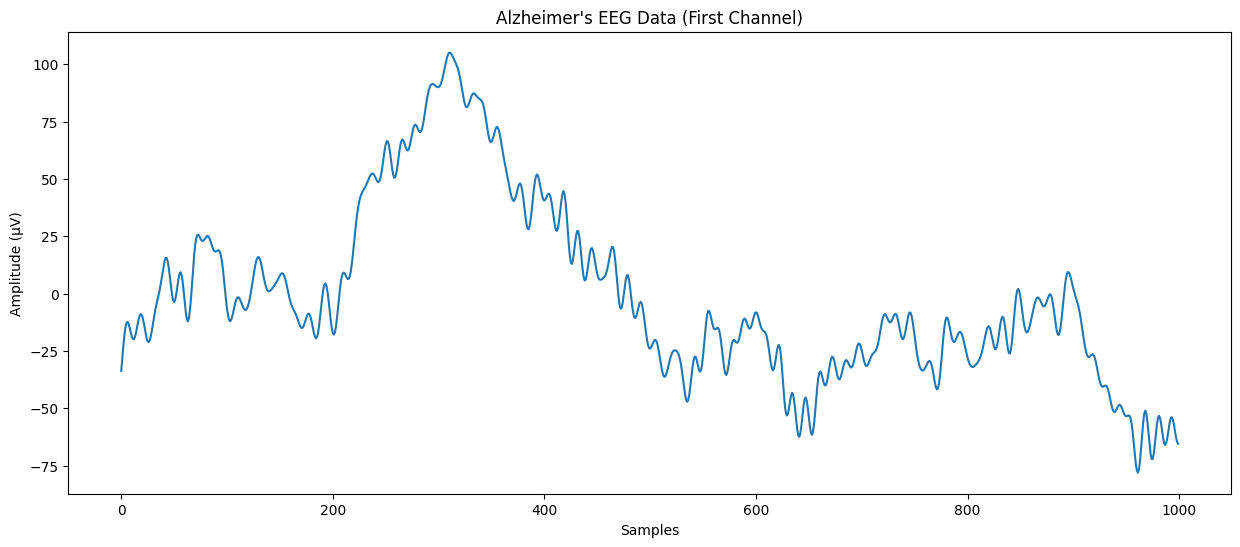

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import mne

# Load the data
ad_raw = np.load('AD_EEG_sub_001.npy')
ad_processed = np.load('AD_EEG_sub_001_processed.npy')
control_raw = np.load('Control_EEG_sub_037.npy')
control_processed = np.load('Control_EEG_sub_037_processed.npy')

# Check basic info
print(f"AD data shape: {ad_processed.shape}")
print(f"Control data shape: {control_processed.shape}")

# Plot a sample of the data
plt.figure(figsize=(15, 6))
plt.plot(ad_processed[0, :1000])  # First channel, first 1000 samples
plt.title('Alzheimer\'s EEG Data (First Channel)')
plt.ylabel('Amplitude (µV)')
plt.xlabel('Samples')
plt.show()

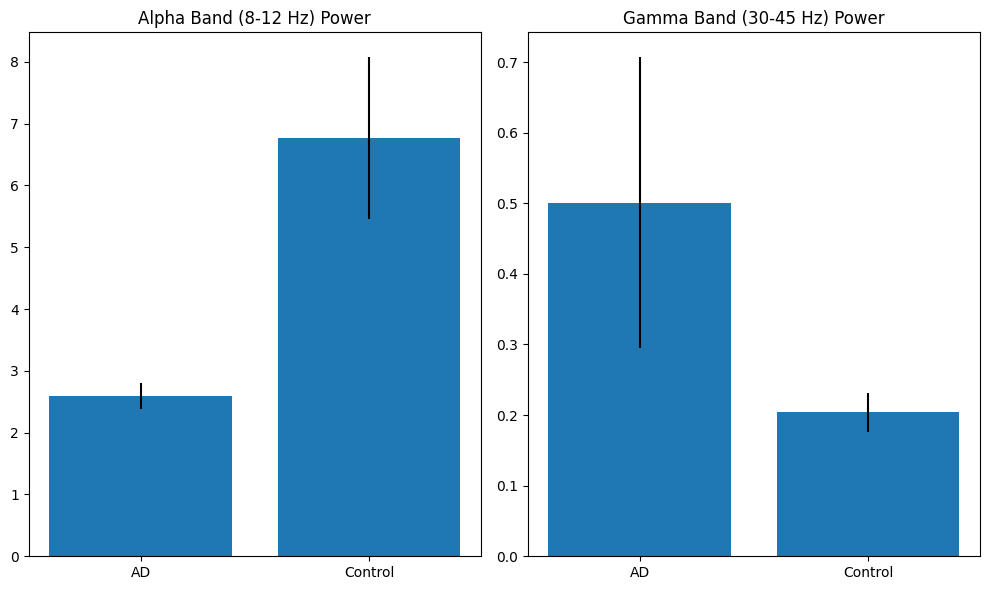

In [11]:
def compute_psd(eeg_data, fs=500):
    """Compute power spectral density for each channel."""
    # Assuming eeg_data shape is (channels, samples)
    n_channels = eeg_data.shape[0]
    psd_data = []
    
    for ch in range(n_channels):
        # Calculate PSD using Welch's method
        f, psd = signal.welch(eeg_data[ch], fs, nperseg=1024)
        psd_data.append(psd)
        
    return f, np.array(psd_data)

# Compute PSD for both groups
f, ad_psd = compute_psd(ad_processed)
f, control_psd = compute_psd(control_processed)

# Define frequency bands
alpha_idx = np.logical_and(f >= 8, f <= 12)  # Alpha: 8-12 Hz
gamma_idx = np.logical_and(f >= 30, f <= 45)  # Gamma: 30-45 Hz

# Calculate average power in each band
ad_alpha_power = np.mean(ad_psd[:, alpha_idx], axis=1)
ad_gamma_power = np.mean(ad_psd[:, gamma_idx], axis=1)
control_alpha_power = np.mean(control_psd[:, alpha_idx], axis=1)
control_gamma_power = np.mean(control_psd[:, gamma_idx], axis=1)

# Plot average alpha and gamma power for each group
plt.figure(figsize=(10, 6))

# Channel-wise comparison
plt.subplot(1, 2, 1)
plt.bar([0, 1], [np.mean(ad_alpha_power), np.mean(control_alpha_power)], 
        yerr=[np.std(ad_alpha_power), np.std(control_alpha_power)])
plt.xticks([0, 1], ['AD', 'Control'])
plt.title('Alpha Band (8-12 Hz) Power')

plt.subplot(1, 2, 2)
plt.bar([0, 1], [np.mean(ad_gamma_power), np.mean(control_gamma_power)], 
        yerr=[np.std(ad_gamma_power), np.std(control_gamma_power)])
plt.xticks([0, 1], ['AD', 'Control'])
plt.title('Gamma Band (30-45 Hz) Power')

plt.tight_layout()
plt.show()